In [1]:
import nilearn.image as image
from nilearn import datasets
from nilearn.maskers import NiftiMasker
from nilearn.plotting import plot_img, plot_anat, plot_stat_map, plot_roi
import numpy as np
import os
import glob
import nibabel as nib
from nilearn.masking import compute_epi_mask
import pandas as pd

In [2]:
data_path= 'C:/Users/ilari/OneDrive - Universite de Montreal/EXP/MRI effort x pain/Output/Eprime/1'

In [3]:
anat_img = os.path.join(data_path, 'sub-001_T1w.nii.gz')

In [4]:
img = nib.load(anat_img)

In [5]:
img.shape

(176, 256, 256)

In [6]:
mask=compute_epi_mask(img)

C:\Users\ilari\AppData\Roaming\Python\Python39\site-packages\nilearn\image\resampling.py:531: UserWarning: Casting data from int16 to float32
  warnings.warn("Casting data from %s to %s" % (data.dtype.name, aux))


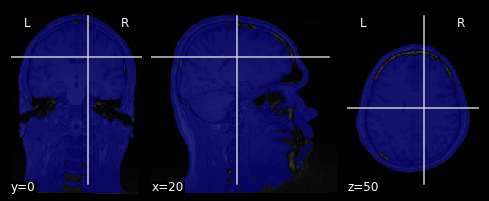

In [7]:
plot_roi(mask, img, cut_coords=(20, 0, 50))

In [8]:
#TR = 0.832 sec


t_r = 0.832
events_1 = pd.read_excel("C:/Users/ilari/OneDrive - Universite de Montreal/EXP/MRI effort x pain/Output/Python/P1_events.xlsx")
events_2 = pd.read_excel("C:/Users/ilari/OneDrive - Universite de Montreal/EXP/MRI effort x pain/Output/Python/P1_events_run 2.xlsx")
events_3 = pd.read_excel("C:/Users/ilari/OneDrive - Universite de Montreal/EXP/MRI effort x pain/Output/Python/P1_events_run 3.xlsx")
events_4 = pd.read_excel("C:/Users/ilari/OneDrive - Universite de Montreal/EXP/MRI effort x pain/Output/Python/P1_events_run 4.xlsx")

print (events_1)
print (events_2)
print (events_3)
print (events_4)

            trial_type    onset  duration
0              Warm_30  191.509    15.681
1               Pain_5  285.089    14.178
2              Pain_30  367.218    10.599
3               Warm_5  445.268    12.009
4              Warm_30  516.932    10.192
5              Pain_30  587.058    17.894
6               Warm_5  665.543    14.442
7               Pain_5  739.364    13.961
8   ContractionSolo_30   80.142    12.251
9    ContractionSolo_5  144.967    13.451
10  ContractionWarm_30  207.190    13.256
11   ContractionPain_5  299.267    14.128
12  ContractionPain_30  377.817    12.699
13   ContractionWarm_5  457.277    13.207
14  ContractionWarm_30  527.124    12.706
15  ContractionPain_30  604.952    11.279
16   ContractionWarm_5  679.985    13.091
17   ContractionPain_5  753.325    11.283
18  ContractionSolo_30  824.178    12.717
            trial_type    onset  duration
0              Pain_30  307.195    13.419
1              Warm_30  391.464    12.091
2               Warm_5  463.312   

In [9]:
data_path_bold= 'C:/Users/ilari/OneDrive - Universite de Montreal/EXP/MRI effort x pain/MRI images/sub-001/func'

In [10]:
path_bold_1 = os.path.join(data_path_bold, 'swvrsub-001_task-pain_run-01_bold.nii')
path_bold_2 = os.path.join(data_path_bold, 'swvrsub-001_task-pain_run-02_bold.nii')
path_bold_3 = os.path.join(data_path_bold, 'swvrsub-001_task-pain_run-03_bold.nii')
path_bold_4 = os.path.join(data_path_bold, 'swvrsub-001_task-pain_run-04_bold.nii')
bold_1 = nib.load(path_bold_1)
bold_2 = nib.load(path_bold_2)
bold_3 = nib.load(path_bold_3)
bold_4 = nib.load(path_bold_4)


In [11]:
# Specify the column names explicitly
#event_types = events['your_trial_type_column']
#onsets = events['your_onset_column']
#durations = events['your_duration_column']

In [11]:
from nilearn.glm.first_level import FirstLevelModel
#first level model run 1
first_level_model_run1 = FirstLevelModel(t_r)
first_level_model_run1 = first_level_model_run1.fit(bold_1, events=events_1)
design_matrix_run1 = first_level_model_run1.design_matrices_[0]

In [12]:
#first level model run 2
first_level_model_run2 = FirstLevelModel(t_r)
first_level_model_run2 = first_level_model_run2.fit(bold_2, events=events_2)
design_matrix_run2 = first_level_model_run2.design_matrices_[0]

In [13]:
#first level model run 3
first_level_model_run3 = FirstLevelModel(t_r)
first_level_model_run3 = first_level_model_run3.fit(bold_3, events=events_3)
design_matrix_run3 = first_level_model_run3.design_matrices_[0]

In [14]:
#first level model run 4
first_level_model_run4 = FirstLevelModel(t_r)
first_level_model_run4 = first_level_model_run4.fit(bold_4, events=events_4)
design_matrix_run4 = first_level_model_run4.design_matrices_[0]

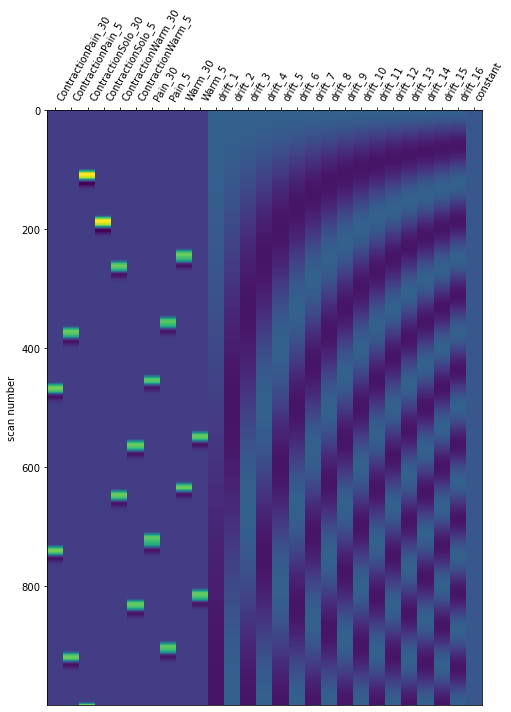

In [15]:
from nilearn.plotting import plot_design_matrix

plot_design_matrix(design_matrix_run1)
import matplotlib.pyplot as plt

plt.show()

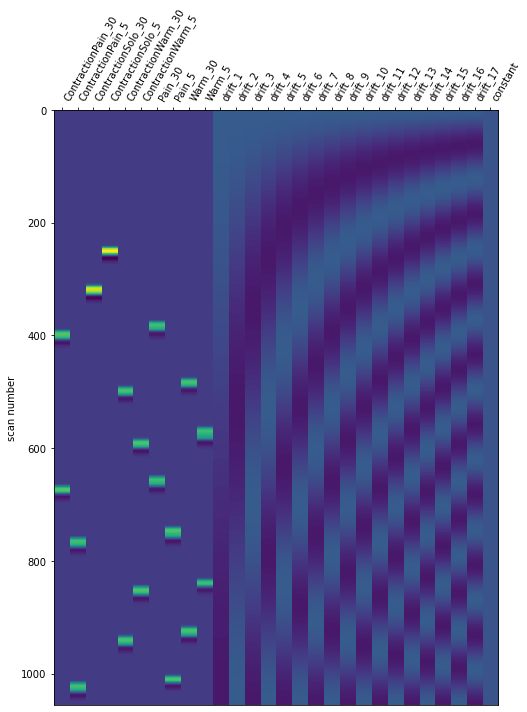

In [16]:
from nilearn.plotting import plot_design_matrix

plot_design_matrix(design_matrix_run2)
import matplotlib.pyplot as plt

plt.show()

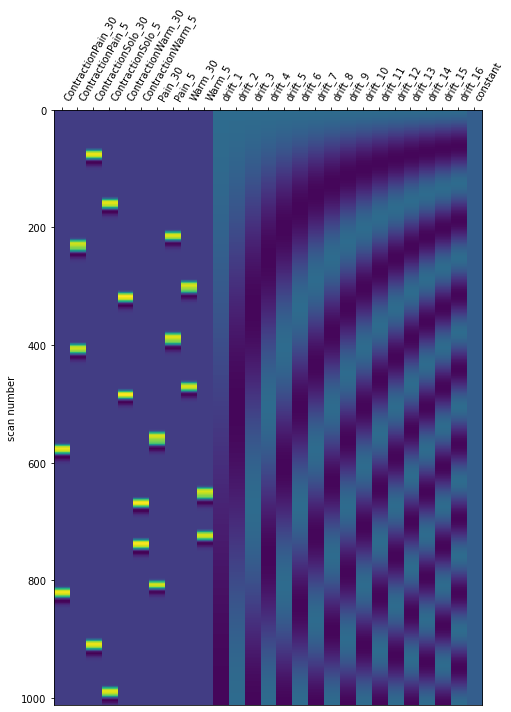

In [17]:
from nilearn.plotting import plot_design_matrix

plot_design_matrix(design_matrix_run3)
import matplotlib.pyplot as plt

plt.show()

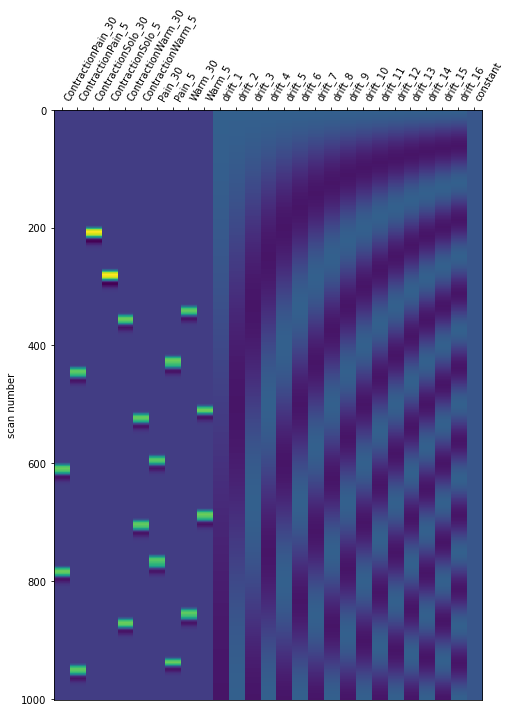

In [18]:
from nilearn.plotting import plot_design_matrix

plot_design_matrix(design_matrix_run4)
import matplotlib.pyplot as plt

plt.show()

In [38]:
import numpy as np

def make_localizer_contrasts(design_matrices):
    """Return a dictionary of contrasts across four runs."""
    
    # Initialize an empty dictionary to store contrasts
    all_contrasts = {}

    # Iterate through each run
    for run_idx, design_matrix_run in enumerate(design_matrices, start=1):
        # Generate canonical contrasts for the current run
        contrast_matrix_run = np.eye(design_matrix_run.shape[1])
        
        # Create a dictionary of contrasts for the current run
        contrasts_run = {
            f"Run_{run_idx}_{column}": contrast_matrix_run[i]
            for i, column in enumerate(design_matrix_run.columns)
        }

        # Add the contrasts for the current run to the overall dictionary
        all_contrasts.update(contrasts_run)

    # Iterate over the runs to create run-specific contrasts
    for run_idx in range(1, len(design_matrices) + 1):
        # Get the column names specific to the current run
        run_columns = [f"Run_{run_idx}_{condition}" for condition in ["Pain_30", "Pain_5", "Warm_30", "Warm_5", "ContractionSolo_5", "ContractionWarm_5", "ContractionPain_5", "ContractionSolo_30", "ContractionWarm_30", "ContractionPain_30"]]

        # Create run-specific contrasts
        all_contrasts[f"Run_{run_idx}_pain"] = all_contrasts[run_columns[0]] + all_contrasts[run_columns[1]]
        all_contrasts[f"Run_{run_idx}_warm"] = all_contrasts[run_columns[2]] + all_contrasts[run_columns[3]]
        all_contrasts[f"Run_{run_idx}_contraction_5"] = all_contrasts[run_columns[4]] + all_contrasts[run_columns[5]] + all_contrasts[run_columns[6]]
        all_contrasts[f"Run_{run_idx}_contraction_30"] = all_contrasts[run_columns[7]] + all_contrasts[run_columns[8]] + all_contrasts[run_columns[9]]
        all_contrasts[f"Run_{run_idx}_contraction_warm"] = all_contrasts[run_columns[5]] + all_contrasts[run_columns[6]]
        all_contrasts[f"Run_{run_idx}_contraction_pain"] = all_contrasts[run_columns[6]] + all_contrasts[run_columns[7]]
        all_contrasts[f"Run_{run_idx}_pain_warm"] = all_contrasts[f"Run_{run_idx}_pain"] - all_contrasts[f"Run_{run_idx}_warm"]
        all_contrasts[f"Run_{run_idx}_contraction_30_5"] = all_contrasts[f"Run_{run_idx}_contraction_30"] - all_contrasts[f"Run_{run_idx}_contraction_5"]
        all_contrasts[f"Run_{run_idx}_contraction_5_pain_warm"] = all_contrasts[run_columns[6]] - all_contrasts[run_columns[5]]
        all_contrasts[f"Run_{run_idx}_contraction_30_pain_warm"] = all_contrasts[run_columns[9]] - all_contrasts[run_columns[8]]
        all_contrasts[f"Run_{run_idx}_contraction_pain_30_5"] = all_contrasts[run_columns[9]] - all_contrasts[run_columns[6]]
        all_contrasts[f"Run_{run_idx}_contractionSolo_30_5"] = all_contrasts[run_columns[7]] - all_contrasts[run_columns[4]]

 


    contrasts = {
        column: contrast_matrix_run[i]
        for i, column in enumerate(design_matrix_run.columns)
    }

    contrasts["pain_warm"] = (
        all_contrasts["Run_1_pain_warm"]
        #all_contrasts["Run_2_pain_warm"]
        + all_contrasts["Run_3_pain_warm"]
        + all_contrasts["Run_4_pain_warm"]
    )
    contrasts["contraction_30_5"] = (
        all_contrasts["Run_1_contraction_30_5"]
        #+all_contrasts["Run_2_contraction_30_5"]
        + all_contrasts["Run_3_contraction_30_5"]
        + all_contrasts["Run_4_contraction_30_5"]
    )
    contrasts["contraction_5_pain_warm"] = (
        all_contrasts["Run_1_contraction_5_pain_warm"]
        #+all_contrasts["Run_2_contraction_30_5"]
        + all_contrasts["Run_3_contraction_5_pain_warm"]
        + all_contrasts["Run_4_contraction_5_pain_warm"]
    )
    contrasts["contraction_30_pain_warm"] = (
        all_contrasts["Run_1_contraction_30_pain_warm"]
        #+all_contrasts["Run_2_contraction_30_5"]
        + all_contrasts["Run_3_contraction_30_pain_warm"]
        + all_contrasts["Run_4_contraction_30_pain_warm"]
    ) 
    contrasts["contraction_pain_30_5"] = (
        all_contrasts["Run_1_contraction_pain_30_5"]
        #+all_contrasts["Run_2_contraction_30_5"]
        + all_contrasts["Run_3_contraction_pain_30_5"]
        + all_contrasts["Run_4_contraction_pain_30_5"]
    )
    contrasts["contractionSolo_30_5"] = (
        all_contrasts["Run_1_contractionSolo_30_5"]
        #+all_contrasts["Run_2_contractionSolo_30_5"]
        + all_contrasts["Run_3_contractionSolo_30_5"]
        + all_contrasts["Run_4_contractionSolo_30_5"]
    ) 
    return contrasts

#  list of design matrices for each run
design_matrices = [design_matrix_run1, design_matrix_run2, design_matrix_run3, design_matrix_run4]

# Call the function to generate contrasts for all runs
localizer_contrasts_example = make_localizer_contrasts(design_matrices)

contrast_contraction_30_5 = localizer_contrasts_example["contraction_30_5"]

# Print the names of all conditions
#for contrast_name in localizer_contrasts_example:
    #print(f"Condition: {contrast_name}")


C:\Users\ilari\AppData\Roaming\Python\Python39\site-packages\nilearn\plotting\matrix_plotting.py:352: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(.4 * len(design_column_names),


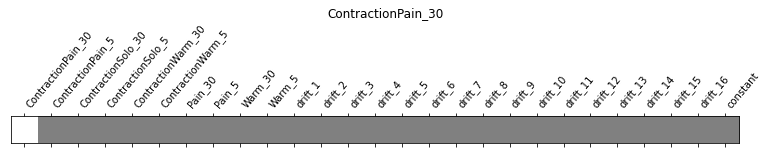

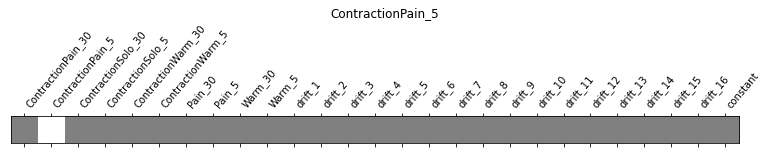

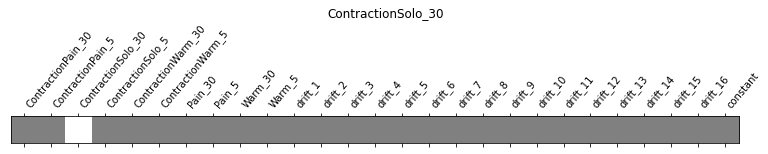

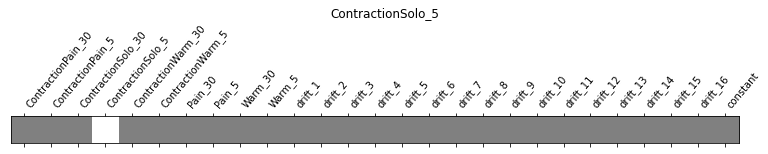

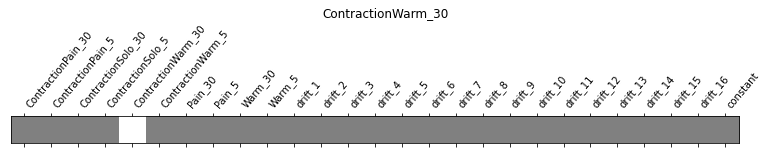

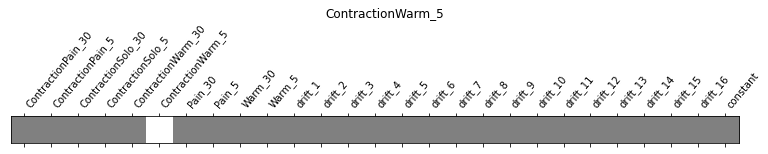

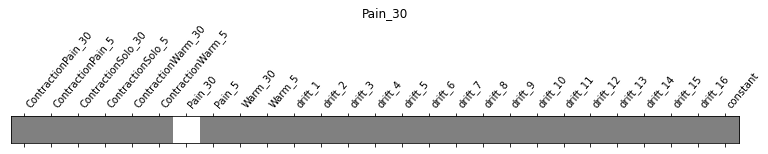

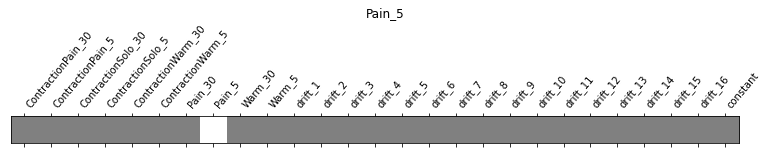

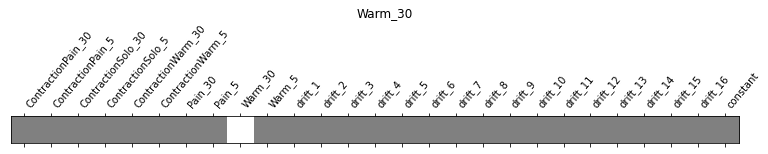

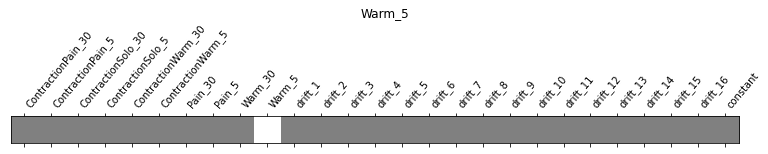

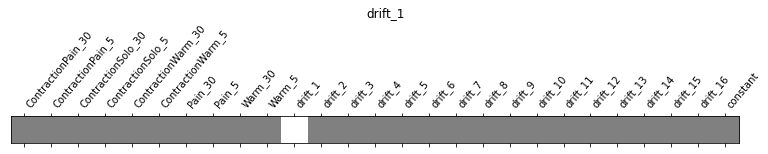

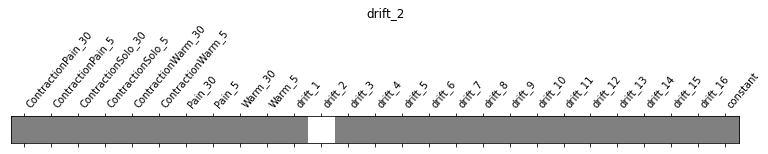

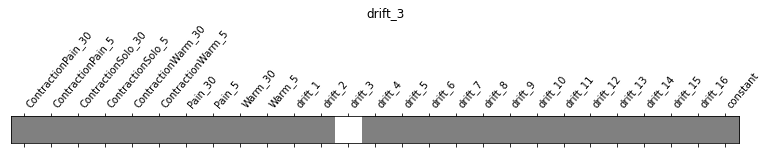

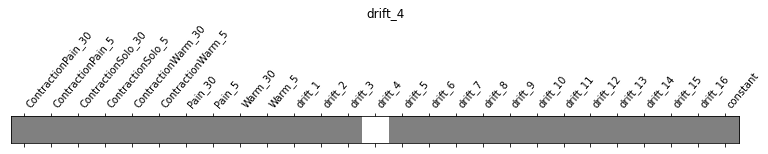

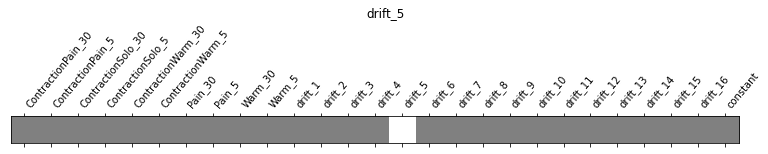

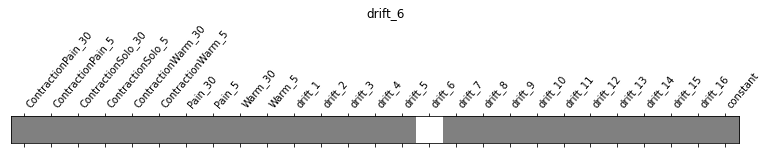

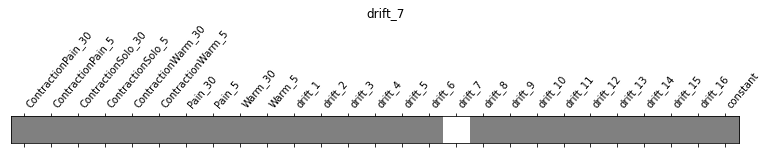

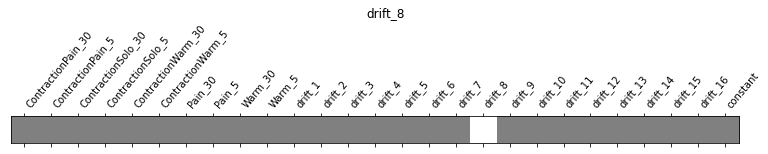

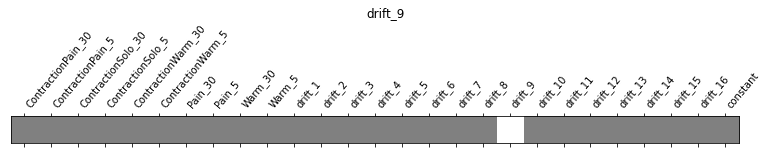

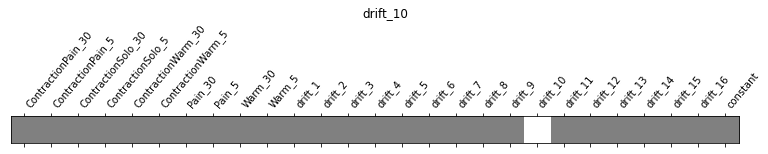

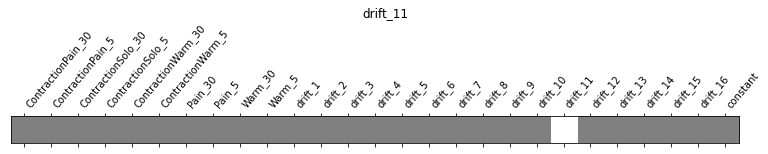

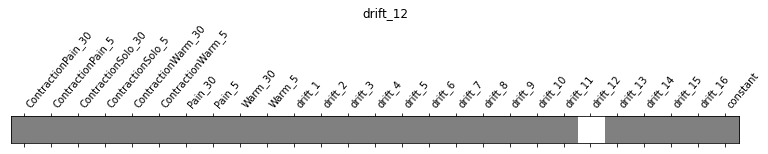

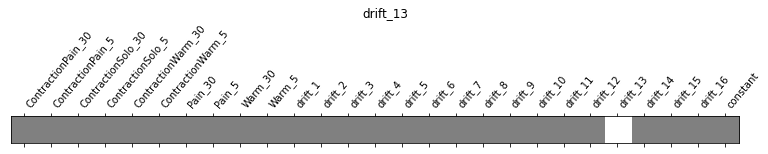

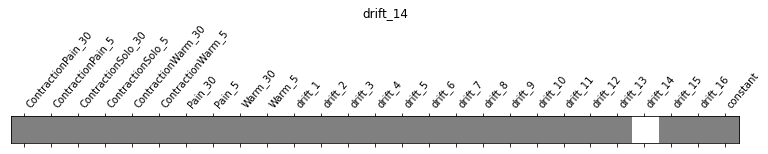

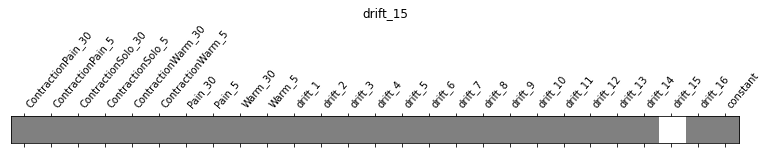

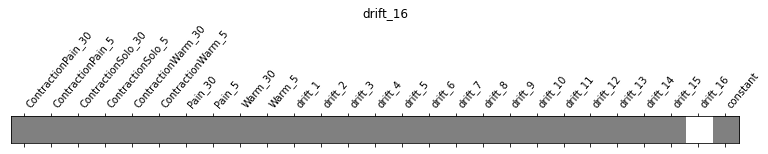

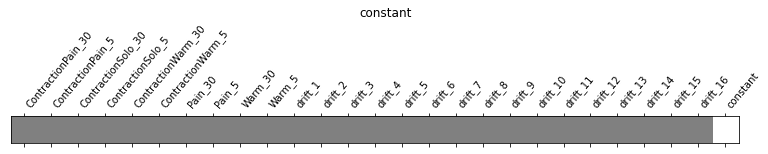

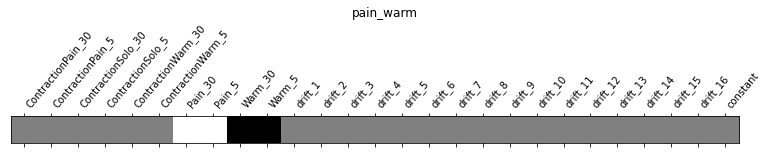

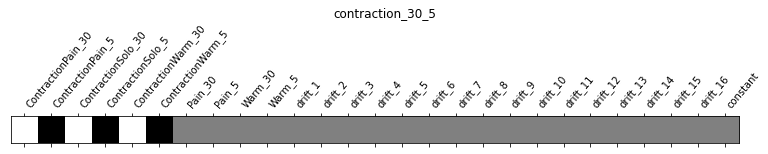

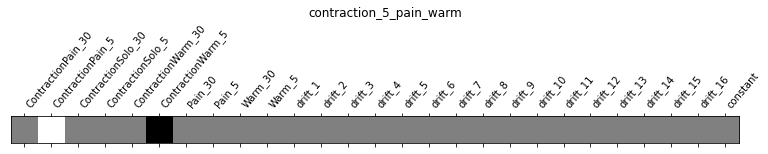

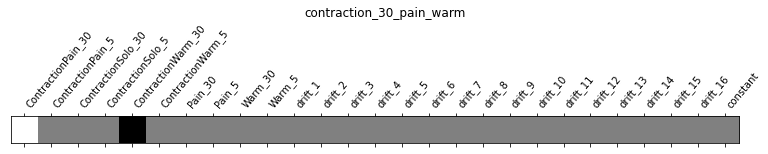

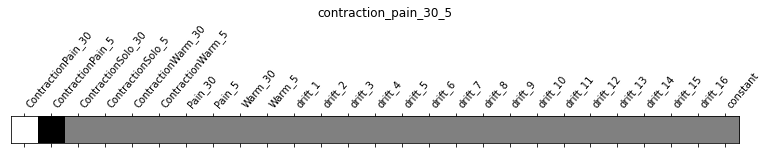

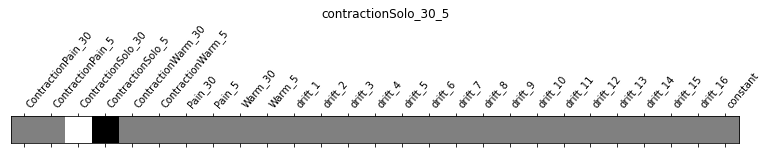

In [40]:
from nilearn.plotting import plot_contrast_matrix

# Choose a specific design matrix from the list
design_matrix_to_visualize = design_matrices[0]

for key, values in localizer_contrasts_example.items():
    plot_contrast_matrix(values, design_matrix=design_matrix_to_visualize)
    plt.suptitle(key)

plt.show()

In [121]:
#from nilearn.plotting import plot_contrast_matrix

#contrasts = make_localizer_contrasts(design_matrix)

#for key, values in contrasts.items():
    #plot_contrast_matrix(values, design_matrix=design_matrix)
    #plt.suptitle(key)

#plt.show()

In [44]:
for run_idx, first_level_model_run in enumerate(first_level_model, start=1):
    print(f"Run {run_idx} - Number of parameters: {len(first_level_model_run.labels_)}")


Run 1 - Number of parameters: 1
Run 2 - Number of parameters: 1
Run 3 - Number of parameters: 1
Run 4 - Number of parameters: 1


ValueError: t contrasts should be length P=28, but this is length 27

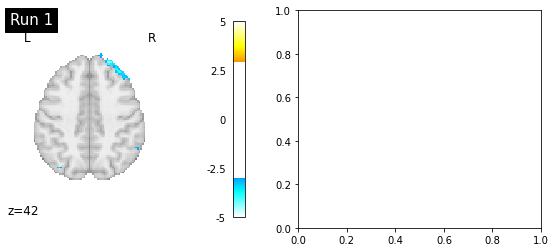

In [45]:
from nilearn import plotting

def plot_contrast_for_runs(first_level_models, desired_contrast, design_matrices):
    """Plot z-maps for a specific contrast across different runs."""
    
    plt.figure(figsize=(20, 4))
    
    for run_idx, (first_level_model, design_matrix_run) in enumerate(zip(first_level_models, design_matrices), start=1):
        ax = plt.subplot(1, len(first_level_models), run_idx)
        
        # Compute the per-contrast z-map for the current run
        z_map = first_level_model.compute_contrast(desired_contrast, output_type="z_score")
        
        # Plot the z-map
        plotting.plot_stat_map(
            z_map,
            display_mode="z",
            threshold=3.0,
            title=f"Run {run_idx}",
            axes=ax,
            cut_coords=1,
        )

    plt.show()

# Convert first_level_model to a list if it's not already
first_level_model = [first_level_model_run1, first_level_model_run2, first_level_model_run3, first_level_model_run4]

design_matrices_example = [design_matrix_run1, design_matrix_run2, design_matrix_run3, design_matrix_run4]
desired_contrast = localizer_contrasts_example["contraction_30_5"]

# Call the modified plot_contrast_for_runs function
plot_contrast_for_runs(first_level_model, desired_contrast, design_matrices_example)

    
    